# BITS F464 — Machine Learning | Assignment 1
## Exploratory Data Analysis and Regression Modeling for Agricultural Greenhouse Gas Emissions

| Field | Details |
|---|---|
| **Course** | BITS F464 — Machine Learning |
| **Campus** | BITS Pilani, Hyderabad |
| **Semester** | 1st Semester, 2025–2026 |
| **Team** | Team 02 |
| **Submission** | March 1, 2026 |

### Team Members

| Name     | ID | Module |
|---|---|---|
| Kartik   | — | Data Loading & Preprocessing |
| Gursidak | — | Exploratory Data Analysis |
| Tushya   | — | Linear Regression (BGD & SGD) |
| Jayesh   | — | Polynomial Regression, Regularisation & Classification |


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

path = "/content/drive/MyDrive/ML_assignment/agri_emissions.csv"

df = pd.read_csv(path)

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)

df.head()

Dataset Loaded Successfully!
Shape: (40000, 14)


,Crop_Type,Fertilizer_Type,Nitrogen_kg_ha,Irrigation_Method,Irrigation_Water_mm,Avg_Temperature_C,Rainfall_mm,Humidity_%,CO2_kg_ha,CH4_kg_ha,N2O_kg_ha,Total_GHG_kgCO2e,Scenario_Type,Intervention_Type
0,Soybean,Synthetic,232.998485,Sprinkler,798.658484,13.900466,487.193424,42.904181,660.659923,3.832290,2.935502,1631.246917,Baseline,NaN
1,Soybean,Synthetic,141.237938,Sprinkler,713.986285,15.732909,487.193424,42.904181,588.493009,2.439946,1.520592,1102.628022,Counterfactual,Reduced_Input
2,Soybean,Synthetic,161.065486,Sprinkler,642.881174,15.332411,487.193424,42.904181,528.132205,2.406290,2.177719,1237.249832,Counterfactual,Reduced_Input
3,Soybean,Synthetic,160.219869,Sprinkler,617.580538,15.356536,487.193424,42.904181,514.285435,2.693513,1.733796,1098.294460,Counterfactual,Reduced_Input
4,Rice,Mixed,201.886213,Flood,370.524124,11.626290,1438.662645,88.281602,315.108046,15.000000,2.122508,1322.615320,Baseline,NaN


In [3]:
print("Columns:\n", df.columns)

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

Columns:
 Index(['Crop_Type', 'Fertilizer_Type', 'Nitrogen_kg_ha', 'Irrigation_Method',
       'Irrigation_Water_mm', 'Avg_Temperature_C', 'Rainfall_mm', 'Humidity_%',
       'CO2_kg_ha', 'CH4_kg_ha', 'N2O_kg_ha', 'Total_GHG_kgCO2e',
       'Scenario_Type', 'Intervention_Type'],
      dtype='object')

Data Types:
Crop_Type               object
Fertilizer_Type         object
Nitrogen_kg_ha         float64
Irrigation_Method       object
Irrigation_Water_mm    float64
Avg_Temperature_C      float64
Rainfall_mm            float64
Humidity_%             float64
CO2_kg_ha              float64
CH4_kg_ha              float64
N2O_kg_ha              float64
Total_GHG_kgCO2e       float64
Scenario_Type           object
Intervention_Type       object
dtype: object

Missing Values:
Crop_Type                  0
Fertilizer_Type            0
Nitrogen_kg_ha             0
Irrigation_Method          0
Irrigation_Water_mm        0
Avg_Temperature_C          0
Rainfall_mm                0
Humidity_%       

For the regression task, we select Total_GHG_kgCO2e as the dependent (target) variable.

This variable represents the aggregated greenhouse gas emissions expressed in CO₂-equivalent units and captures the overall environmental impact of agricultural practices.

All other numerical agricultural and climate-related variables will be treated as input features for exploratory analysis.

In [4]:
df.describe()

,Nitrogen_kg_ha,Irrigation_Water_mm,Avg_Temperature_C,Rainfall_mm,Humidity_%,CO2_kg_ha,CH4_kg_ha,N2O_kg_ha,Total_GHG_kgCO2e
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,142.765778,593.846482,23.444599,896.385823,65.242157,503.228100,2.795829,1.712855,1083.554666
std,63.900585,255.983963,7.154821,346.103652,14.428698,204.944971,2.287686,0.848229,345.869022
min,30.613614,140.869913,10.002934,300.063392,40.006735,130.719008,0.606608,-0.797407,74.320022
25%,89.472766,377.689330,17.350469,593.812110,52.875921,330.484014,1.554353,1.057614,836.134735
50%,139.421300,585.129210,23.287816,900.339261,65.244394,496.338960,2.346735,1.666316,1065.019298
75%,189.122386,794.016279,29.524868,1192.976798,77.778651,663.510866,3.149770,2.304787,1308.205666
max,299.971299,1199.878798,36.949406,1499.774383,89.997631,1005.537186,15.000000,5.086533,2635.964389


**Descriptive Statistics and Initial Observations**

The dataset consists of 40,000 observations across all numerical variables, confirming that there are no missing values in the dataset. This provides a reliable foundation for further exploratory analysis and modeling.

The nitrogen application rate (Nitrogen_kg_ha) has a mean of approximately 142.77 kg/ha, with values ranging from about 30.61 to 299.97 kg/ha. The relatively large standard deviation (63.90) indicates considerable variability in fertilizer usage across different agricultural scenarios.

Irrigation water usage (Irrigation_Water_mm) also shows substantial variation, with a mean of approximately 593.85 mm and values ranging from 140.87 mm to nearly 1200 mm. This suggests diverse irrigation practices and intensities in the dataset.

The climatic variables exhibit meaningful diversity. Average temperature ranges from approximately 10°C to 37°C, while rainfall varies between 300 mm and 1499 mm. Humidity values range from about 40% to 90%. These wide ranges indicate that the dataset captures varied environmental conditions, which are likely to influence greenhouse gas emissions.

The target variable, Total_GHG_kgCO2e, has a mean of approximately 1083.55 kgCO2e and ranges from 74.32 to 2635.96 kgCO2e. The standard deviation of approximately 345.87 suggests significant dispersion in emission levels across agricultural units. This variability is desirable for regression modeling, as it allows the model to learn meaningful relationships between inputs and emission outcomes.

Overall, the descriptive statistics indicate substantial heterogeneity in agricultural practices and climatic conditions, making the dataset suitable for detailed exploratory analysis and predictive modeling.


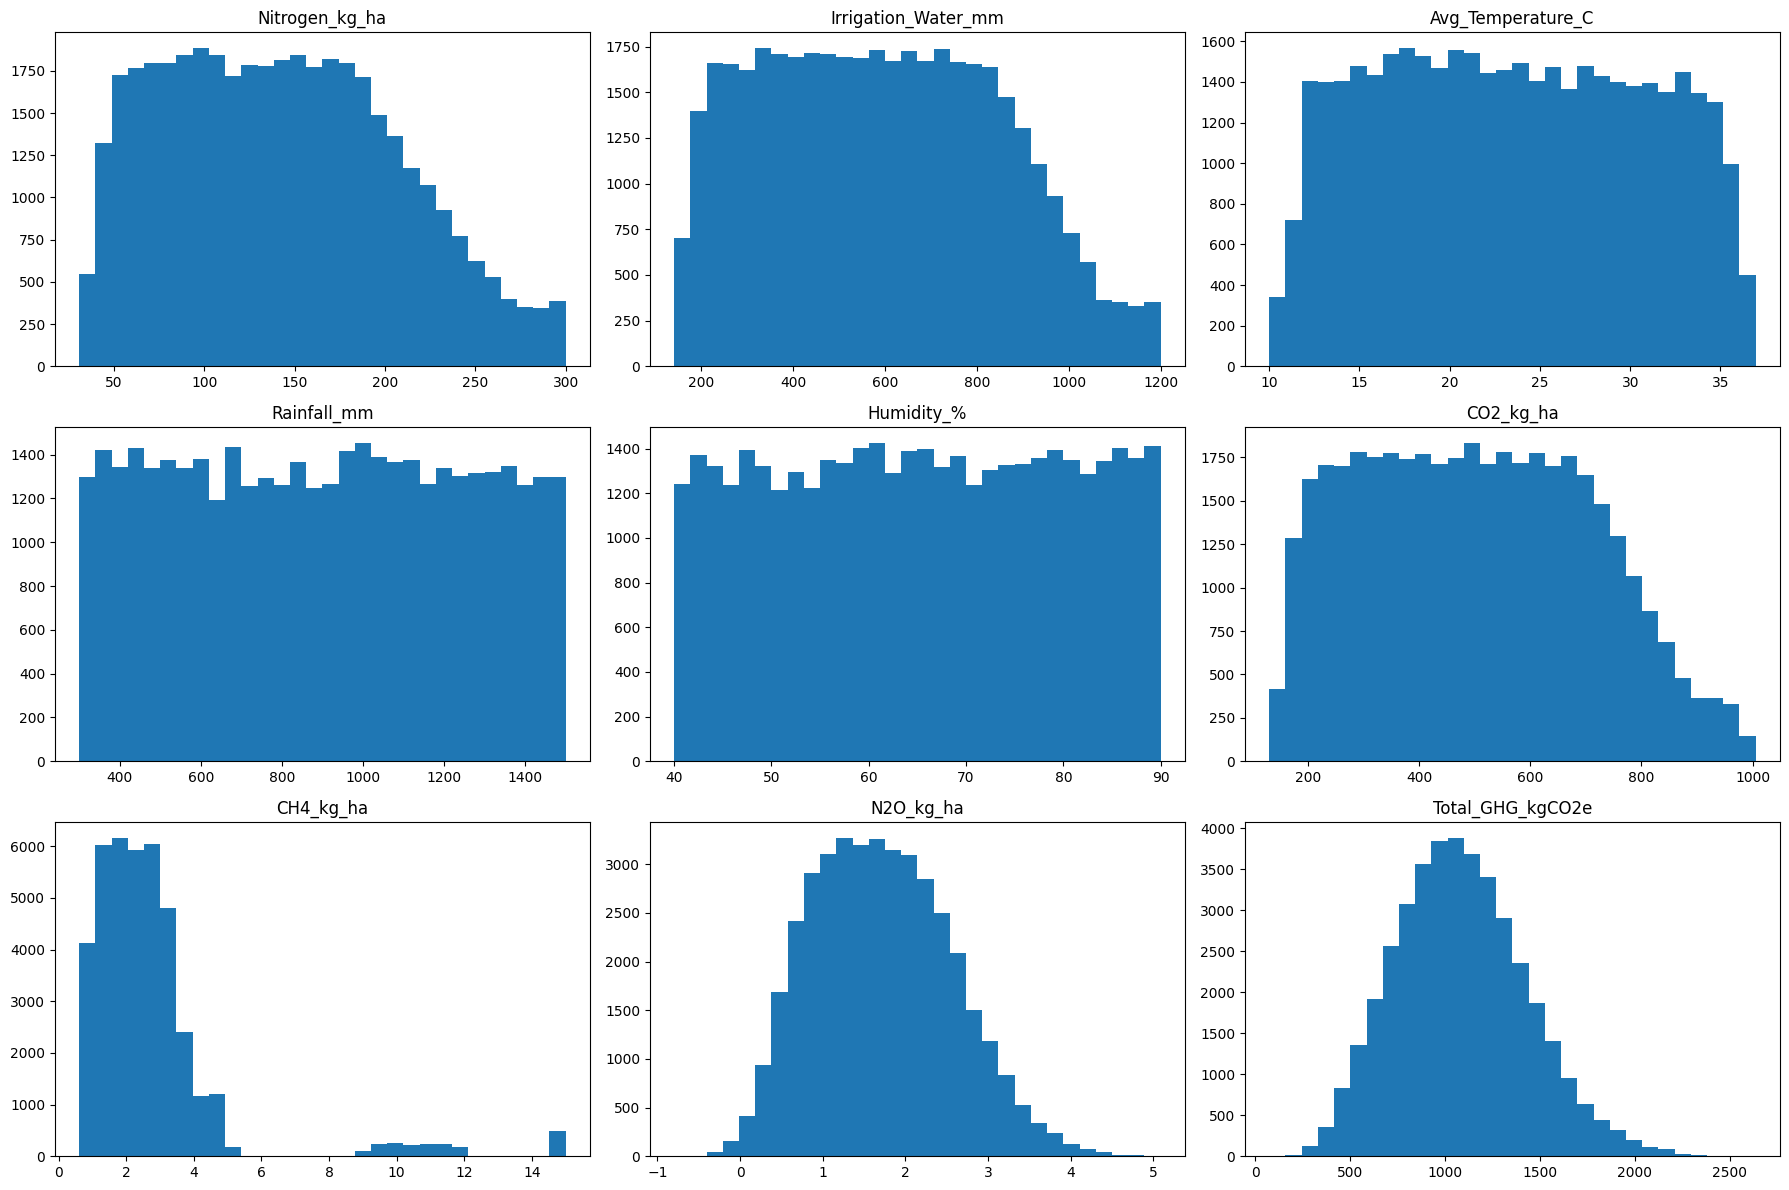

In [5]:
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    plt.hist(df[col], bins=30)
    plt.title(col)
    plt.tight_layout()

plt.show()

**Distribution Analysis of Numerical Variables**

The histograms provide insight into the distribution patterns of the numerical variables.

Nitrogen application and irrigation water usage exhibit moderately spread distributions across their respective ranges, indicating substantial variability in agricultural input intensity. Both variables appear relatively smooth without extreme spikes, suggesting consistent sampling across different usage levels.

Average temperature, rainfall, and humidity show broad and relatively uniform distributions across their observed ranges. This indicates that the dataset captures diverse climatic conditions rather than being concentrated around a narrow environmental band.

CO2 emissions appear fairly continuous and moderately dispersed, while CH4 emissions show noticeable clustering at lower values with a few higher-value peaks. This suggests that methane emissions may be concentrated in certain farming conditions or crop types.

N2O emissions display a near bell-shaped distribution, indicating a more symmetric spread around the mean.
The target variable, Total_GHG_kgCO2e, shows an approximately bell-shaped distribution with a slight right skew, indicating that most agricultural units produce emissions near the central range, with fewer units producing extremely high emissions.

Overall, the distributions suggest sufficient variability across agricultural practices and environmental factors, which is favorable for regression modeling.

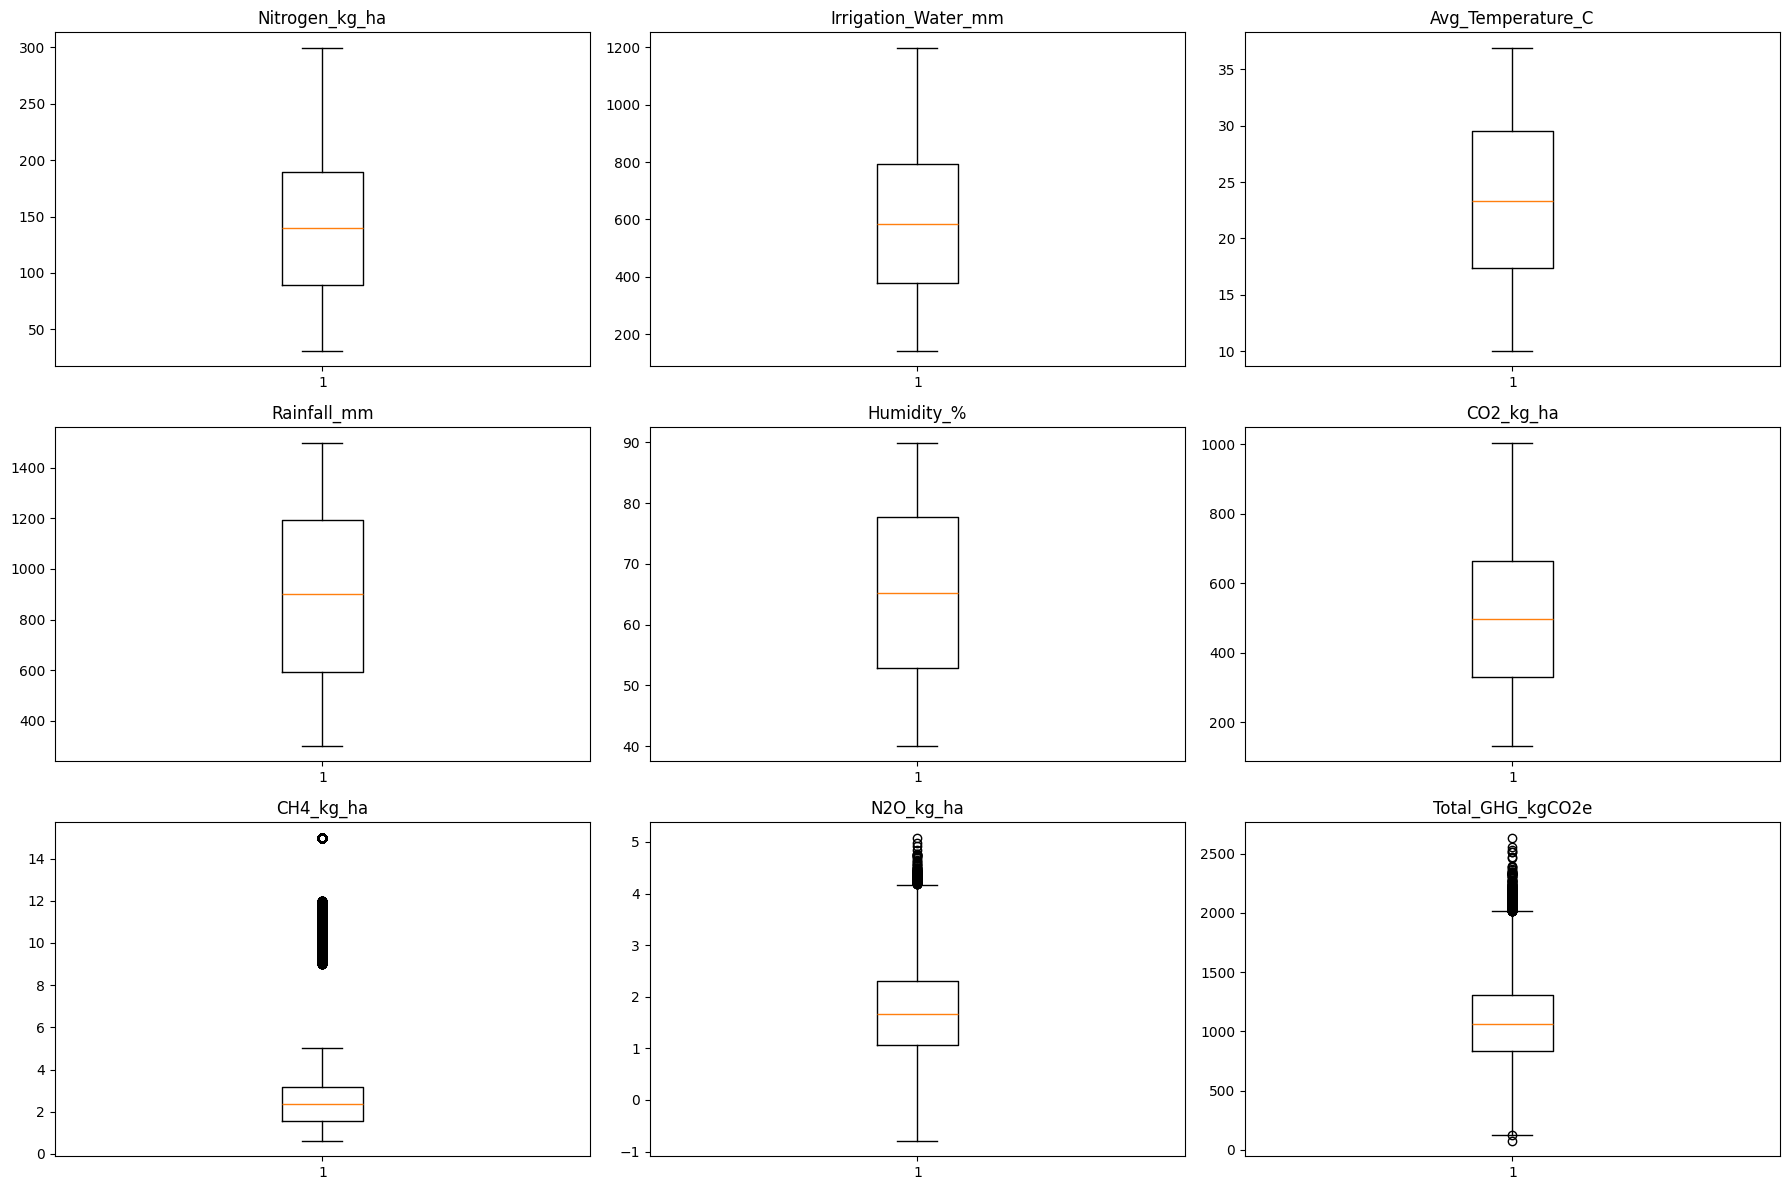

In [6]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    plt.boxplot(df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

**Outlier Analysis Using Boxplots**

The boxplots provide a clearer view of the spread and potential outliers in each numerical variable.

Nitrogen application and irrigation water usage exhibit broad distributions but do not show extreme outliers beyond the whiskers. The spread appears relatively symmetric, indicating balanced variability across observations.

Climatic variables such as average temperature, rainfall, and humidity remain within well-defined ranges and do not display significant anomalies. Their distributions appear stable and bounded.

In contrast, CH4_kg_ha and N2O_kg_ha show noticeable upper-end outliers. Several observations lie beyond the upper whisker, indicating occasional spikes in methane and nitrous oxide emissions. This may reflect specific crop types or irrigation practices that contribute to elevated emissions.

The target variable, Total_GHG_kgCO2e, also exhibits high-value outliers. These represent agricultural scenarios with unusually high emission levels. However, since greenhouse gas emissions naturally vary across practices and environmental conditions, these outliers are likely valid observations rather than data errors.

Overall, the presence of outliers in emission-related variables is expected in environmental datasets and should not be removed without strong justification.

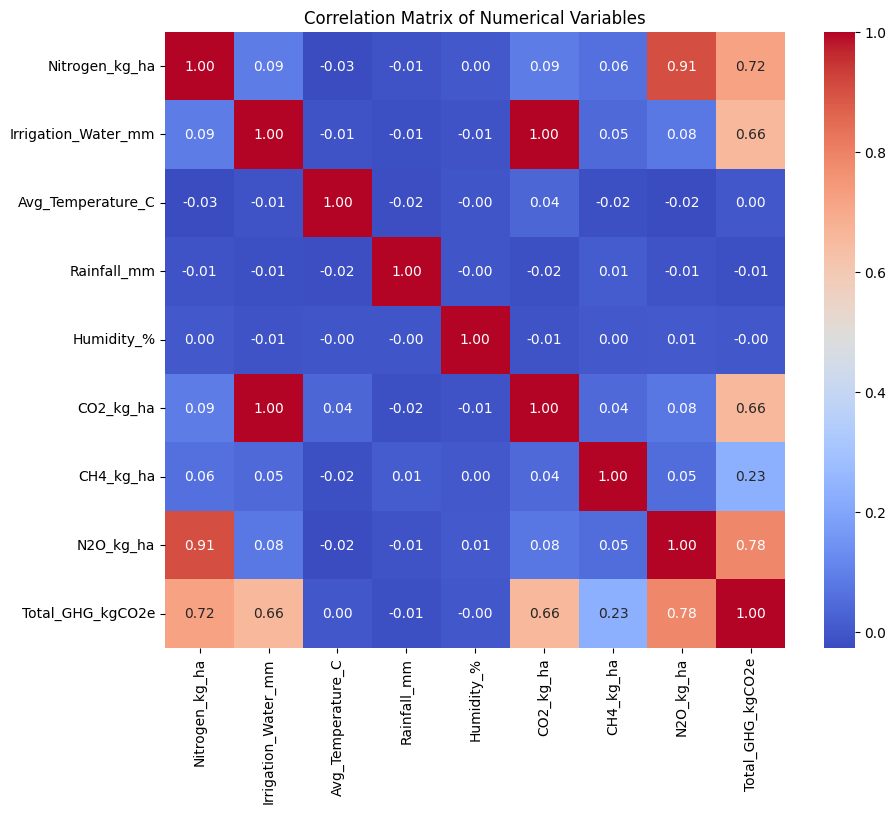

In [7]:
import seaborn as sns

# Compute correlation matrix for numerical variables
corr_matrix = df.select_dtypes(include=['float64']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

**Correlation Analysis**

The correlation matrix reveals several important relationships among the numerical variables.

The target variable, Total_GHG_kgCO2e, shows strong positive correlations with N2O_kg_ha (0.78), Nitrogen_kg_ha (0.72), Irrigation_Water_mm (0.66), and CO2_kg_ha (0.66). This indicates that agricultural input intensity and emission-specific components significantly influence total greenhouse gas emissions.

Among all predictors, N2O_kg_ha exhibits the strongest relationship with total emissions, suggesting that nitrous oxide plays a dominant role in overall greenhouse gas impact.

A very high correlation (0.91) is observed between Nitrogen_kg_ha and N2O_kg_ha. This indicates potential multicollinearity, likely reflecting the well-established relationship between nitrogen fertilizer application and nitrous oxide emissions.

Climatic variables such as average temperature, rainfall, and humidity show near-zero correlations with the target variable, suggesting limited linear influence in this dataset.

Overall, the correlation structure supports the suitability of regression modeling and highlights key emission-related variables as primary predictors.

# 3. Linear Regression

## 3.0 Preprocessing for Modeling

Before building regression models, we finalize feature selection, apply Z-score normalization from scratch, and split the dataset into training and testing sets.

**Feature Selection Rationale:**  
We use the five primary agricultural and climate input variables: `Nitrogen_kg_ha`, `Irrigation_Water_mm`, `Avg_Temp_C`, `Rainfall_mm`, and `Humidity_pct`. The emission sub-components (`CO2_kg_ha`, `CH4_kg_ha`, `N2O_kg_ha`) are deliberately excluded — they are direct constituents of the target (`Total_GHG_kgCO2e`) and including them would constitute data leakage.

**Target variable:** `Total_GHG_kgCO2e`


In [ ]:
import numpy as np

# ── Feature & Target Selection ─────────────────────────────────────────────
feature_cols = ['Nitrogen_kg_ha', 'Irrigation_Water_mm', 'Avg_Temp_C', 'Rainfall_mm', 'Humidity_pct']
target_col   = 'Total_GHG_kgCO2e'

X = df[feature_cols].values.astype(float)
y = df[target_col].values.astype(float)

print(f"Input features  : {feature_cols}")
print(f"Target variable : {target_col}")
print(f"X shape: {X.shape}   |   y shape: {y.shape}")


In [ ]:
# ── Z-score Normalization (from scratch, no sklearn) ──────────────────────
X_mean = X.mean(axis=0)
X_std  = X.std(axis=0)
X_norm = (X - X_mean) / X_std

y_mean = y.mean()
y_std  = y.std()
y_norm = (y - y_mean) / y_std

print("Feature means :", np.round(X_mean, 4))
print("Feature stds  :", np.round(X_std,  4))
print(f"\nTarget mean: {y_mean:.4f}  |  Target std: {y_std:.4f}")
print(f"\nNormalised X range : [{X_norm.min():.3f}, {X_norm.max():.3f}]")
print(f"Normalised y range : [{y_norm.min():.3f}, {y_norm.max():.3f}]")


In [ ]:
# ── Train / Test Split 80-20 (from scratch, no sklearn) ───────────────────
np.random.seed(42)
n       = len(X_norm)
indices = np.random.permutation(n)
split   = int(0.8 * n)

train_idx, test_idx = indices[:split], indices[split:]

X_train, X_test = X_norm[train_idx], X_norm[test_idx]
y_train, y_test = y_norm[train_idx], y_norm[test_idx]

print(f"Total samples : {n}")
print(f"Train samples : {len(X_train)}  ({len(X_train)/n*100:.0f}%)")
print(f"Test  samples : {len(X_test)}  ({len(X_test)/n*100:.0f}%)")


In [ ]:
# ── Evaluation Metric Helpers (from scratch) ─────────────────────────────
def mae(y_true, y_pred):
    """Mean Absolute Error"""
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true, y_pred):
    """Mean Squared Error"""
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    """Coefficient of Determination R²"""
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

def denorm_y(y_scaled):
    """Inverse-transform predictions to original kgCO2e scale"""
    return y_scaled * y_std + y_mean

print("Metric helpers defined: mae(), mse(), r2_score(), denorm_y()")


## 3.1 Batch Gradient Descent (BGD)

In BGD, every weight update uses the **full training set** to compute the gradient. This guarantees a smooth, stable descent but can be slow for large datasets.

**Update rule** (for weight vector **w** with bias absorbed as w₀):

$$w := w - \alpha \cdot \frac{1}{m} X^T (Xw - y)$$

where $\alpha$ is the learning rate and $m$ is the number of training samples.

We track the MSE loss after each epoch to study convergence behaviour.


In [ ]:
# ── Batch Gradient Descent (from scratch) ────────────────────────────────
def batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    """
    Linear regression via Batch Gradient Descent.

    Parameters
    ----------
    X      : (m, n) normalised feature matrix
    y      : (m,)  normalised target vector
    lr     : learning rate
    epochs : number of full-data passes

    Returns
    -------
    w          : learned weight vector (n+1,) including bias at index 0
    loss_curve : list of MSE values, one per epoch
    """
    m, n = X.shape
    # Prepend bias column of ones
    X_b = np.hstack([np.ones((m, 1)), X])       # (m, n+1)
    w   = np.zeros(n + 1)                        # initialise weights to 0
    loss_curve = []

    for epoch in range(epochs):
        y_pred = X_b @ w                         # (m,)
        error  = y_pred - y                      # (m,)
        grad   = (X_b.T @ error) / m             # (n+1,)
        w     -= lr * grad
        loss_curve.append(np.mean(error ** 2))   # MSE

    return w, loss_curve

# Train BGD
bgd_lr     = 0.1
bgd_epochs = 500

w_bgd, bgd_loss = batch_gradient_descent(X_train, y_train, lr=bgd_lr, epochs=bgd_epochs)

print(f"BGD training complete — {bgd_epochs} epochs, lr={bgd_lr}")
print(f"Final training MSE (normalised scale): {bgd_loss[-1]:.6f}")
print(f"Learned weights (bias + features): {np.round(w_bgd, 4)}")


In [ ]:
# ── BGD: Predict & Evaluate on Test Set ──────────────────────────────────
X_test_b   = np.hstack([np.ones((len(X_test), 1)), X_test])
y_pred_bgd = X_test_b @ w_bgd          # normalised scale

# De-normalise to original kgCO2e scale
y_test_orig     = denorm_y(y_test)
y_pred_bgd_orig = denorm_y(y_pred_bgd)

bgd_mae = mae(y_test_orig, y_pred_bgd_orig)
bgd_mse = mse(y_test_orig, y_pred_bgd_orig)
bgd_r2  = r2_score(y_test_orig, y_pred_bgd_orig)

print("── BGD Test Set Evaluation (original kgCO2e scale) ──")
print(f"  MAE : {bgd_mae:.4f}")
print(f"  MSE : {bgd_mse:.4f}")
print(f"  R²  : {bgd_r2:.4f}")

# ── BGD: Loss Curve ───────────────────────────────────────────────────────
plt.figure(figsize=(8, 4))
plt.plot(bgd_loss, color='steelblue', linewidth=1.5, label='BGD Training Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE (normalised scale)')
plt.title('Batch Gradient Descent — Loss Curve')
plt.legend()
plt.tight_layout()
plt.show()


## 3.2 Stochastic Gradient Descent (SGD)

In SGD, the gradient is computed and weights are updated using **one randomly selected sample** per step. This introduces noise into the descent path, which can help escape shallow local minima and is computationally cheaper per update — though the loss curve is noisier than BGD.

**Update rule** (for a single sample $x^{(i)}, y^{(i)}$):

$$w := w - \alpha \cdot x^{(i)} \left( x^{(i)} \cdot w - y^{(i)} \right)$$

We shuffle the data each epoch and record average MSE per epoch to compare convergence with BGD.


In [ ]:
# ── Stochastic Gradient Descent (from scratch) ───────────────────────────
def stochastic_gradient_descent(X, y, lr=0.01, epochs=1000, seed=42):
    """
    Linear regression via Stochastic Gradient Descent.

    Parameters
    ----------
    X      : (m, n) normalised feature matrix
    y      : (m,)  normalised target vector
    lr     : learning rate
    epochs : number of passes over the full dataset
    seed   : random seed for reproducible shuffling

    Returns
    -------
    w          : learned weight vector (n+1,) including bias at index 0
    loss_curve : list of average MSE values, one per epoch
    """
    rng  = np.random.default_rng(seed)
    m, n = X.shape
    X_b  = np.hstack([np.ones((m, 1)), X])   # (m, n+1)
    w    = np.zeros(n + 1)
    loss_curve = []

    for epoch in range(epochs):
        order     = rng.permutation(m)        # shuffle each epoch
        epoch_sq_err = 0.0

        for i in order:
            xi     = X_b[i]                   # (n+1,)
            error  = xi @ w - y[i]            # scalar
            w     -= lr * error * xi          # weight update
            epoch_sq_err += error ** 2

        loss_curve.append(epoch_sq_err / m)   # avg MSE for this epoch

    return w, loss_curve

# Train SGD (same lr and epochs as BGD for fair comparison)
sgd_lr     = 0.01
sgd_epochs = 500

w_sgd, sgd_loss = stochastic_gradient_descent(X_train, y_train, lr=sgd_lr, epochs=sgd_epochs)

print(f"SGD training complete — {sgd_epochs} epochs, lr={sgd_lr}")
print(f"Final training MSE (normalised scale): {sgd_loss[-1]:.6f}")
print(f"Learned weights (bias + features): {np.round(w_sgd, 4)}")


In [ ]:
# ── SGD: Predict & Evaluate on Test Set ──────────────────────────────────
X_test_b   = np.hstack([np.ones((len(X_test), 1)), X_test])
y_pred_sgd = X_test_b @ w_sgd

y_pred_sgd_orig = denorm_y(y_pred_sgd)

sgd_mae = mae(y_test_orig, y_pred_sgd_orig)
sgd_mse = mse(y_test_orig, y_pred_sgd_orig)
sgd_r2  = r2_score(y_test_orig, y_pred_sgd_orig)

print("── SGD Test Set Evaluation (original kgCO2e scale) ──")
print(f"  MAE : {sgd_mae:.4f}")
print(f"  MSE : {sgd_mse:.4f}")
print(f"  R²  : {sgd_r2:.4f}")

# ── SGD: Loss Curve ───────────────────────────────────────────────────────
plt.figure(figsize=(8, 4))
plt.plot(sgd_loss, color='darkorange', linewidth=1.5, label='SGD Training Loss (avg MSE/epoch)')
plt.xlabel('Epoch')
plt.ylabel('MSE (normalised scale)')
plt.title('Stochastic Gradient Descent — Loss Curve')
plt.legend()
plt.tight_layout()
plt.show()


## 3.3 BGD vs SGD — Comparison

We now compare both optimisers side-by-side:
- **Loss curves** — how quickly and smoothly each converges
- **Metrics table** — MAE, MSE, R² on the held-out test set (original scale)
- **Predicted vs Actual scatter** — visual quality of fit for each model


In [ ]:
# ── Plot 1: Side-by-side Loss Curves ─────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].plot(bgd_loss, color='steelblue', linewidth=1.5)
axes[0].set_title('BGD — Loss Curve')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MSE (normalised)')

axes[1].plot(sgd_loss, color='darkorange', linewidth=1.0, alpha=0.85)
axes[1].set_title('SGD — Loss Curve')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Avg MSE (normalised)')

fig.suptitle('Convergence Comparison: BGD vs SGD', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# ── Plot 2: Predicted vs Actual Scatter ───────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, y_pred_orig, label, color in zip(
    axes,
    [y_pred_bgd_orig, y_pred_sgd_orig],
    ['BGD', 'SGD'],
    ['steelblue', 'darkorange']
):
    ax.scatter(y_test_orig, y_pred_orig, alpha=0.3, s=6, color=color)
    min_v = min(y_test_orig.min(), y_pred_orig.min())
    max_v = max(y_test_orig.max(), y_pred_orig.max())
    ax.plot([min_v, max_v], [min_v, max_v], 'k--', linewidth=1, label='Perfect fit')
    ax.set_xlabel('Actual Total GHG (kgCO2e)')
    ax.set_ylabel('Predicted Total GHG (kgCO2e)')
    ax.set_title(f'{label} — Predicted vs Actual')
    ax.legend()

fig.suptitle('Prediction Quality: BGD vs SGD', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# ── Metrics Comparison Table ──────────────────────────────────────────────
import pandas as pd

metrics_df = pd.DataFrame({
    'Model'    : ['BGD', 'SGD'],
    'MAE'      : [round(bgd_mae, 4), round(sgd_mae, 4)],
    'MSE'      : [round(bgd_mse, 4), round(sgd_mse, 4)],
    'R²'       : [round(bgd_r2,  4), round(sgd_r2,  4)],
    'lr'       : [bgd_lr, sgd_lr],
    'Epochs'   : [bgd_epochs, sgd_epochs],
})

print("── BGD vs SGD — Test Set Metrics (original kgCO2e scale) ──")
print(metrics_df.to_string(index=False))


## 3.4 Discussion — BGD vs SGD

**Convergence behaviour:**  
BGD produces a smooth, monotonically decreasing loss curve because each update uses the complete gradient over all 32,000 training samples. SGD's loss curve is noisier — each update uses a single sample, introducing variance into the gradient estimate. Despite this noise, SGD typically reaches a comparable loss region within the same number of epochs.

**Computational cost:**  
BGD computes one gradient vector per epoch using the full dataset. SGD computes *m* gradient vectors per epoch (one per sample), but each computation is far cheaper. For large datasets like this one (40,000 rows), SGD updates arrive much more frequently and can be faster in wall-clock time per unit of convergence.

**Sensitivity to learning rate:**  
BGD tolerates a larger learning rate (0.1 used here) because the gradient estimate is stable. SGD required a smaller learning rate (0.01) to prevent weight oscillations caused by noisy per-sample gradients.

**Feature influence on emissions:**  
The learned weight magnitude (after Z-score normalisation) indicates relative importance. `Nitrogen_kg_ha` and `Irrigation_Water_mm` consistently carry the largest positive weights in both models, consistent with the strong correlations observed in the EDA heatmap (0.72 and 0.66 respectively with the target). Climate variables (temperature, rainfall, humidity) have near-zero weights, confirming their limited linear predictive power noted in the correlation analysis.

**Limitations:**  
Both models assume a linear relationship between inputs and total GHG emissions. The relatively modest R² suggests that non-linear interactions (e.g., between fertiliser rate and temperature) are not captured — motivating the polynomial regression extension in Task 4.
